Als pip geïnstalleerd is (dit kan bij het installeren van python aangegeven worden), kan de volgende cel geuncommend worden om automatisch alle pakketten die nodig zijn te installeren.

In [87]:
#!pip install numpy scipy matplotlib

De pakketten die nodig zijn worden in de python file geïmporteerd. Hierbij is:

- `numpy` de numerieke wiskunde module voor het gebruik van bijvoorbeeld e-functies en goniometrische functies.
- `scipy` de numerieke solver module voor in dit geval het oplossen van eigenwaarde problemen. `scipy` heeft echter nog meer functies voor bijvoorbeeld het oplossen van differentiaalvergelijkingen en regressiemodules.
- `matplotlib` als plot-module.

`scipy` en `matplotlib` zijn beide grote pakketten, en niet alles is nodig voor dit programma. Daarom worden alleen specifieke gedeeltes van deze modules geïmporteerd.

In [88]:
import numpy as np
from scipy.linalg import eigh_tridiagonal
import matplotlib.pyplot as plt
import matplotlib.animation as PillowWriter
from matplotlib import animation

#plt.style.use("seaborn-v0_8-colorblind") # Sorry ik ben kleurenblind dus ik moet speciale dingen hebben.

# Schroedinger met FDM

Zoals document al aangaf kan de Schroedingervergelijken numeriek opgelost worden door alles in een big ass tri-diagonale matrix te zetten en er een lineaire algebra opdracht van te maken.

$$
\begin{bmatrix}
\frac{1}{\Delta x'^2}+V'_1 & -\frac{1}{2 \Delta x'^2} &   0 & 0...\\
-\frac{1}{2 \Delta x'^2} & \frac{1}{\Delta x'^2}+V'_2 & -\frac{1}{2 \Delta y^2} & 0... \\
...& ... & ... & -\frac{1}{2 \Delta x^2}\\
...0 & 0 & -\frac{1}{2 \Delta x'^2} & \frac{1}{\Delta x'^2}+V'_{N-1}\\
\end{bmatrix} \cdot \begin{pmatrix}
\psi_1\\
\psi_2\\
\vdots\\
\psi_{N-1}
\end{pmatrix} = E' \begin{pmatrix}
\psi_1\\
\psi_2\\
\vdots\\
\psi_{N-1}
\end{pmatrix}
$$


Hier bij zijn: 

- $E' = \frac{m L^2}{\hbar^2} E$
- $V' = \frac{m L^2}{\hbar^2} V$
- $x' = \frac{x}{L}$

dimensieloze grootheden. Dit maakt echter voor het oplossen van $\psi$ niet uit, aangezien deze sowieso dimensieloos is.

Dus volgende dingen zijn nodig in python:

- een functie die het potentiaal definieerd.
- een functie die onze big ass lineaire algebra probleem oplost.

# Functie voor potentiaal

Er wordt een functie gemaakt om het potentiaal te beschrijven. Om een functie te maken in python wordt als eerste het keyword `def` gebruikt om aan te geven dat het om een functie gaat. Vervolgens wordt er een naam aan deze functie gegeven, in dit geval `V_p`. Als laatste wordt tussen haakjes de input variabelen gegeven. Het potentiaal is afhankelijk van de x-as, dus wordt deze variabele `x` genoemd, maar de naam van deze variabele is vrij te kiezen. Vervolgens wordt de regel afgesloten met een dubbele punt.

Dan wordt de `return` gedefinieerd. Dit is wat de functie moet teruggeven wanneer deze gebruikt wordt. Hier wordt alleen een vector teruggegeven die de lengte van `x` heeft met alles een waarde nul. Aangezien voor de FDM-methode er randvoorwaarden gesteld worden voor het oplossen, kan er gewoon een potentiaal van $$V(x) = 0 $$ gedefinieerd worden, en zorgen de randvoorwaarden ervoor dat er een oneindig diepe put ontstaat.

**Let op** dat alles na de dubbele punt met een tab verschoven is. Dit is om aan het programma aan te geven dat dit allemaal binnen de functie valt. Dit is noodzakelijk om te doen, anders werkt het programma niet.


In [89]:
def V_p(x):

    # return np.zeros(len(x)) # Voor infinite square well

    return  100* ((x>=0.25) * (x<=0.75)).astype(float) # Voor finite square well

# Functie voor het lineaire algebra probleem

de tridiagonale matrix bestaat uit:
- 1 hoofddiagonaal
- 2 gelijke nevendiagonalen

`scipy` heeft een functie om eigenwaarde problemen van tridiagonale matrices op te lossen. Dus het stappenplan wordt:

1. definieer de hoofdiagonaal
2. definieer de nevendiagonaal (deze hoeft maar 1 keer gedefinieerd te worden want de de nevendiagonalen moeten altijd gelijk zijn bij een tridiagonale matrix)
3. voer de diagonalen aan de eigenwaarden functie van `scipy` en let de magic happen
    - de `eigenh_tridiagonal` functie van `scipy` geeft de eigenwaarden en eigenvectoren uit in volgorde: eigenwaarden, eigenvectoren
    - het gebruik van deze functie is als volgt :
    
 ```python
 eigenwaarden, eigenvectoren = eigh_tridiagonal(hoofdiagonaal, nevendiagonaal)
 ```
 

**Let op** dat bij het definiëren van de matrix de eerste en laatste entry van de matrix niet meegenomen worden aangezien deze 0 zijn. Daarom is het noodzakelijk om bij het opstellen van de matrix ook deze entries weg te laten in het potentiaal. Vandaar dat er `V_p(x)[1:-1]` staat. De `[1:-1]` geeft aan dat alles waardes in de lijst meegenomen worden, behalve de eerste en laatste.

In [90]:
def Schroedinger(x, dx):

    main = 1/(dx**2) + V_p(x)[1:-1]
    off = -1/(2*dx**2) * np.ones(len(main)-1) # lengte van de nevendiagonalen = lengte van hoofd - 1

    E, psi = eigh_tridiagonal(main, off) # psi word uitgegeven als een matrix waarbij elke kolomn een eigenvector is.

    return E, psi.T # psi wordt dmv psi.T getransponeerd, zodat elke vector 1 rij wordt.
                    # dit hoef je niet te doen maar ik vind het makkelijker met de syntex voor het plotten

# Berekening van eigenvectoren

Nu de functies al geschreven zijn is het makkelijk om de eigenwaarden en eigenvectoren te berekenen. Het enige wat moet gebeuren is dat $x$ en $dx$ gedefinieerd worden (dimensieloos), en dan worden ze aan de functie `Schroedinger` gegegeven.

Vergeet niet dat de randvoorwaarde voor $\psi$

$$\psi(0) = \psi(1) = 0$$

In [91]:
# Variabelen
N = 1000    # aantal gridpoints
dx = 1/N    # spacing van gridpoints
x = np.linspace(0, 1, N+1)

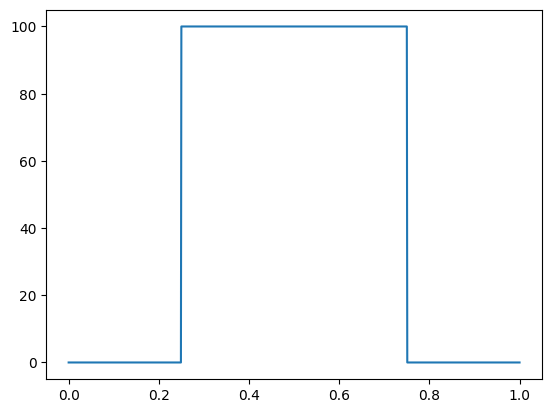

In [92]:
V = V_p(x)

plt.plot(x, V)

plt.show()

In [93]:
E, psi = Schroedinger(x, dx)

# Controle of $\psi$ genormaliseerd is

er kan getest worden op de normaliteit van $\psi$ door het inproduct te nemen, hierbij geldt

$$\psi_i \cdot \psi_j = \delta_{ij}$$

Het inproduct kan in python berekend worden met de `@` operator.

In [94]:
psi[0]@psi[0] # bijna 1

0.9999999999999998

In [95]:
psi[0]@psi[1] # bijna 0

1.7339026481113585e-15

Nu de functie gerund heeft kunnen we kijken naar de eerste 3 energieniveaus. Pas op dat deze dimensieloos zijn, dus wat er uitgegeven wordt is

$$E'= \frac{mL^2E}{\hbar^2}$$

In [96]:
E[0:5]

array([ 45.9347632 ,  46.23944218, 113.95606803, 143.4681843 ,
       178.50085613])

Deze zijn dimensieloos, dus om de daadwerkelijke energie te krijgen:

$$ E = \frac{\hbar^2 E'}{m L^2} $$

maar dat doe ik niet want geeft weinig toegevoegde waarde. Je kan ook namelijk dimensieloos plotten.

# plotten van eerste 4 golffuncties

De volgende cellen geef een algoritme voor het plotten van de golffuncties en hun waarschijnlijkheden. Dit kan eenvoudig gedaan worden met een for-loop. In de for-loop zijn volgende dingen aangegeven.

De for-loop begin met het keyword `for` dat aangeeft dat het een for-loop is. Vervolgens wordt de variabele aangegeven waarover geïtereerd dient te worden (hier `i` of `j`. Vervolgens wordt aangegeven over welk bereik geïtereerd wordt. Dit kan een lijst van waardes zijn.

De amplitude van de golffunctie is met 2000 vermenigvuldigd, om de visualisatie beter te maken. Daarom wordt aanbevolen om naar het naar uiteindes te kijken en deze waarde te vergelijken met de hoogte van de put. 

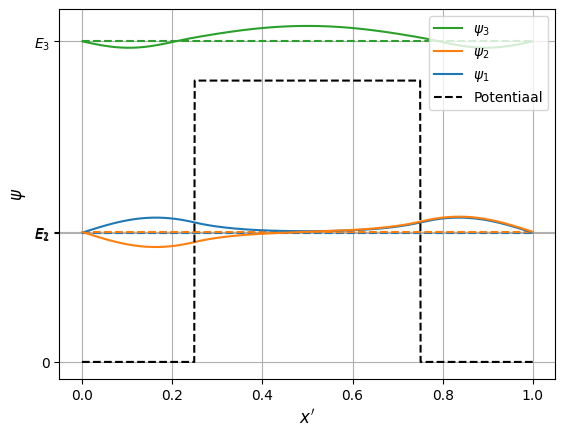

In [97]:
fig, ax = plt.subplots(1,1)
plt.yticks([0, E[0]*2, E[1]*2, E[2]*2] , [r"0", r"$E_1$", r"$E_2$", r"$E_3$"])
ax.grid(True)

plt.gca().set_prop_cycle(None)

#plotting the energy levels
for j in np.linspace(0,2,3):
    plt.plot(x,np.zeros(len(x))+E[int(j)]*2,'--')

plt.gca().set_prop_cycle(None)

for i in range(0,3):
    ax.plot(x[1:-1], psi[i]*200+(E[i]*2), label=("$\psi_{%i}$" %(i+1)))

ax.plot(x, V_p(x)*2, 'k--', label='Potentiaal')

ax.set_xlabel(r"$x'$", fontsize=12)
ax.set_ylabel(r"$\psi$", fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 1, 0, 3]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper right')

plt.show()